In [3]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [4]:
header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'
    }
theatre_url = 'https://www.theatre.kiev.ua/'
get_theatre_repertoire_page = requests.get(theatre_url , headers=header)
soup = bs(get_theatre_repertoire_page.text, "html.parser")

In [94]:
divs = soup.find_all('div', class_='card p-0')

names, dates, times, theatres = [], [], [], []
for r in divs:
    info = r.find('div', class_='card-body p-1')
    name = info.find('p', class_='h6 pt-1' ).text
    day, time = info.find_all('p', class_='h5')
    day, time = day.text, time.text
    theatre = info.find('small').text
    names.append(name) 
    dates.append(day)
    times.append(time)
    theatres.append(theatre)
    print(name, day, time, theatre)


Святе сімейство 12 грудня 2023 18:30 Національний академічний драматичний театр ім.Лесі Українки
SALIDA CRUZADA - 8 кроків танго 12 грудня 2023 18:30 Київський академічний театр на Печерську
У Києві, на Подолі, або «Гдє Ві сохнітє бєльйо?»  12 грудня 2023 19:00 Київський академічний театр "Колесо"
Механічний апельсин  13 грудня 2023 18:00 Київський академічний драматичний театр на Подолі
Сімейка Аддамсів  13 грудня 2023 18:00 Київський Національний Академічний театр оперети
За двома зайцями 13 грудня 2023 18:00 Будинок Офіцерів
№ 13 13 грудня 2023 18:00 Національний академічний драматичний театр ім.Лесі Українки
Чорний дрізд.  13 грудня 2023 18:00 Київський академічний театр драми і комедії на лівому березі Дніпра
Альбатроси.  13 грудня 2023 18:00 Київський академічний театр драми і комедії на лівому березі Дніпра
Льовушка  13 грудня 2023 18:00 Київський академічний драматичний театр на Подолі
Вистава «Попередні пестощі» 13 грудня 2023 18:30 CARIBBEAN club
Свої 13 грудня 2023 18:30 Нац

In [95]:
theatres_df = pd.DataFrame({'Name': names, 'Date': dates, 'Time': times, 'Theatre':theatres})
print(theatres_df)


                                                  Name             Date  \
0                                      Святе сімейство   12 грудня 2023   
1                      SALIDA CRUZADA - 8 кроків танго   12 грудня 2023   
2    У Києві, на Подолі, або «Гдє Ві сохнітє бєльйо?»    12 грудня 2023   
3                                 Механічний апельсин    13 грудня 2023   
4                                    Сімейка Аддамсів    13 грудня 2023   
..                                                 ...              ...   
494                               Приємна несподіванка   10 лютого 2024   
495                                     «Наші КАЙДАШІ»   11 лютого 2024   
496  Kyiv Modern Ballet. Маленький принц. Pаду Покл...  10 березня 2024   
497         Kyiv Modern Ballet. Жізель. Раду Поклитару  22 березня 2024   
498            Kyiv Modern Ballet. Вій. Раду Поклітару   27 квітня 2024   

      Time                                            Theatre  
0    18:30  Національний академічни

In [96]:
def replace_month(date_string):
    for key, value in months_dictionary.items():
        date_string = date_string.replace(value, key)
    return date_string
months_dictionary = {'01':'січня', '02': 'лютого', 
                     '03': 'березня', '04': 'квітня', 
                     '05': 'травня', '06': 'червня',
                     '07': 'липня', '08': 'серпня',
                     '09': 'вересня', '10': 'жовтня',
                     '11': 'листопада','12': 'грудня'}
theatres_df["Date"] = theatres_df["Date"].apply(replace_month)
theatres_df["Date"] = pd.to_datetime(theatres_df["Date"], format='%d %m %Y')

theatres_df["Time"] =  pd.to_datetime(theatres_df['Time'], format='%H:%M').dt.time

In [97]:
theatres_df

,Name,Date,Time,Theatre
0,Святе сімейство,2023-12-12,18:30:00,Національний академічний драматичний театр ім....
1,SALIDA CRUZADA - 8 кроків танго,2023-12-12,18:30:00,Київський академічний театр на Печерську
2,"У Києві, на Подолі, або «Гдє Ві сохнітє бєльйо?»",2023-12-12,19:00:00,"Київський академічний театр ""Колесо"""
3,Механічний апельсин,2023-12-13,18:00:00,Київський академічний драматичний театр на Подолі
4,Сімейка Аддамсів,2023-12-13,18:00:00,Київський Національний Академічний театр оперети
...,...,...,...,...
494,Приємна несподіванка,2024-02-10,18:00:00,Будинок Офіцерів
495,«Наші КАЙДАШІ»,2024-02-11,18:00:00,Будинок Офіцерів
496,Kyiv Modern Ballet. Маленький принц. Pаду Покл...,2024-03-10,18:00:00,МЦКМ (Жовтневий палац)
497,Kyiv Modern Ballet. Жізель. Раду Поклитару,2024-03-22,18:00:00,МЦКМ (Жовтневий палац)


In [102]:
from sklearn.cluster import KMeans
replace_dict = {0: 'Вечірня', 1: 'Денна', 2: 'Післяобідня'}
def fractions(time):
    return time.hour / 24.0 + time.minute / 1440.0 + time.second / 86400.0

features = theatres_df['Time'].apply(fractions).values.reshape(-1, 1)
kmeans = KMeans(n_clusters=3)
theatres_df['Cluster'] = kmeans.fit_predict(features)

def replace_time_periods(cluster):
    for key, value in replace_dict.items():
        if cluster == key:
            cluster = value
    return cluster
    
theatres_df['Cluster'] = theatres_df['Cluster'].apply(replace_time_periods)
theatres_df.to_csv("theatre_repertiore.csv")
theatres_df[theatres_df['Cluster']=='Вечірня']

c:\Users\natal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Date,Time,Theatre,Cluster
0,Святе сімейство,2023-12-12,18:30:00,Національний академічний драматичний театр ім....,Вечірня
1,SALIDA CRUZADA - 8 кроків танго,2023-12-12,18:30:00,Київський академічний театр на Печерську,Вечірня
2,"У Києві, на Подолі, або «Гдє Ві сохнітє бєльйо?»",2023-12-12,19:00:00,"Київський академічний театр ""Колесо""",Вечірня
3,Механічний апельсин,2023-12-13,18:00:00,Київський академічний драматичний театр на Подолі,Вечірня
4,Сімейка Аддамсів,2023-12-13,18:00:00,Київський Національний Академічний театр оперети,Вечірня
...,...,...,...,...,...
494,Приємна несподіванка,2024-02-10,18:00:00,Будинок Офіцерів,Вечірня
495,«Наші КАЙДАШІ»,2024-02-11,18:00:00,Будинок Офіцерів,Вечірня
496,Kyiv Modern Ballet. Маленький принц. Pаду Покл...,2024-03-10,18:00:00,МЦКМ (Жовтневий палац),Вечірня
497,Kyiv Modern Ballet. Жізель. Раду Поклитару,2024-03-22,18:00:00,МЦКМ (Жовтневий палац),Вечірня


<BarContainer object of 3 artists>

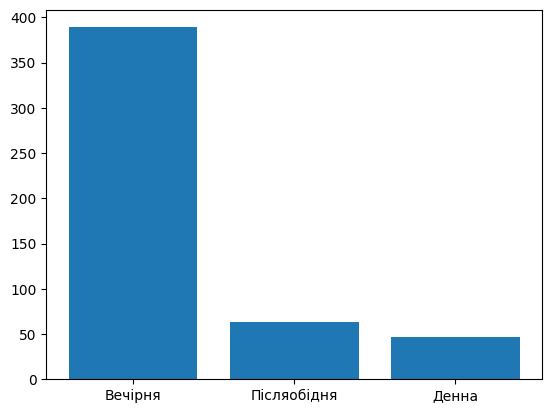

In [103]:
plt.bar(theatres_df['Cluster'].value_counts().index, theatres_df['Cluster'].value_counts().values)

In [104]:
plays_dict = dict()

for play in theatres_df['Name']:
    if play not in plays_dict:
        plays_dict[play] = 1
    else:
        plays_dict[play] += 1
plays_dict = dict(sorted(plays_dict.items(), key=lambda item: item[1], reverse=True))
print('Number of unique plays: ', len(plays_dict))
print('The most popular play,', '\"', max(plays_dict, key=plays_dict.get), '\",', 'will be hosted', max(plays_dict.values()), 'times')
print('_____________________________')
print('All plays: ')
for k, v in plays_dict.items():
    print(k, v)

Number of unique plays:  329
The most popular play, " Мавка Шоу ", will be hosted 18 times
_____________________________
All plays: 
Мавка Шоу 18
Льовушка  5
SALIDA CRUZADA - 8 кроків танго  5
Ножиці  5
Украдене щастя  4
Приємна несподіванка 4
Шахрайки?.. Лесбійки?!! Красуні!  4
У Києві, на Подолі, або «Гдє Ві сохнітє бєльйо?»  3
№ 13 3
Потрібен брехун!  3
Основний інстинкт 3
Тигролови  3
Хлібне перемир’я. 3
Як продати чоловіка  3
Емігранти  3
Дзвінок із минулого 3
Френк Сінатра  3
Занадто одружений таксист  3
«37 листівок». 3
Дамський кравець  3
Не боюсь Вірджинії Вулф  3
«Море... Ніч... Свічки...» 3
Хостел 24/7  3
Для домашнього огнища  3
Вбити не можна розлучитися  3
Ім'я  3
Методи виховання малих засранців  3
Хазяїн  3
Цвіт Жакаранди  3
AGNORIS  3
Корсиканка. 3
Історія, якій понад 2000 років  3
Свої  3
Сімейна вечеря  3
№13 або Олінклюзів 3
З цією виставою щось не так 3
Сімейний альбом / Album di Famiglia.  3
Жіноча логіка. 3
Святе сімейство 2
Сімейка Аддамсів  2
За двома зайцями 2

In [105]:
theatre_dict = dict()

for t in theatres_df['Theatre']:
    if t not in theatre_dict:
        theatre_dict[t] = 1
    else:
        theatre_dict[t] += 1

theatre_dict = dict(sorted(theatre_dict.items(), key=lambda item: item[1], reverse=True))
print('Number of theatres:', len(theatre_dict))
print('The most productive theatre:', max(theatre_dict, key=theatre_dict.get), 'with', max(theatre_dict.values()), 'plays')
print('_____________________________')
print('All theatres:')
for k, v in theatre_dict.items():
    print(k, v)

Number of theatres: 46
The most productive theatre: Національний академічний драматичний театр ім.Лесі Українки with 89 plays
_____________________________
All theatres:
Національний академічний драматичний театр ім.Лесі Українки 89
Київський академічний драматичний театр на Подолі 62
Київський академічний театр драми і комедії на лівому березі Дніпра 62
Київський академічний театр на Печерську 29
Київський Національний Академічний театр оперети 28
Київський академічний театр "Колесо" 21
Концерт-хол ВДНГ 18
Український малий драматичний театр 17
Будинок Офіцерів 16
Театр на Михайлівській 13
Культурний центр «Арт-Братислава» 12
Київський академічний театр “Золоті ворота” 11
Київська опера (Театр опери і балету для дітей та юнацтва) 9
Київський академічний театр юного глядача на Липках. 8
Сцена 6 7
Будинок Архітектора 7
Театр Драматургів 7
Національний центр театрального мистецтва ім. Леся Курбаса (НЦТІ ім. Леся Курбаса) 7
CARIBBEAN club 6
Арт-студія «Темний Софіт» 6
Київський драматични

театр 393
академічний 316
грудня 249
січня 243
київський 235
драматичний 174
національний 123
ім.лесі 89
українки 89
подолі 66
комедії 63
драми 62
лівому 62
березі 62
дніпра 62
будинок 30
печерську 29
оперети 28
колесо 22
центр 19


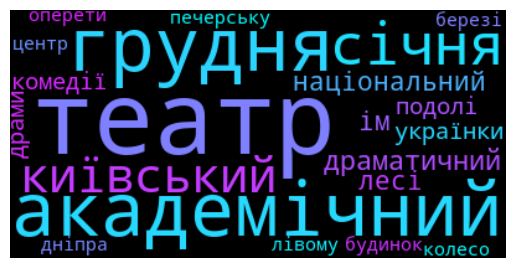

In [111]:
import re

from wordcloud import WordCloud
text = str(names) + str(dates) + str(theatres) 
text = text.lower()
pattern = re.compile(r'\b(?:[^\d\s]{3,})\b')
matches = pattern.findall(text)
overall_words_stats = {}
for m in matches:
    if m not in overall_words_stats:
        overall_words_stats[m] = 1
    else:
        overall_words_stats[m] += 1

top20_words = dict(sorted(overall_words_stats.items(), key=lambda item: item[1], reverse=True)[0:20])
for k, v in top20_words.items():
    print(k, v)

wordcloud_text = " ".join(top20_words.keys())
wc = WordCloud(colormap='cool_r').generate(wordcloud_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()